# White-box Attack on CIFAR10

In [1]:
import sys

import torch
import torch.nn as nn

sys.path.insert(0, '..') # For, jupyter_notebook
import torchattacks

## Load model and data

In [2]:
from torchvision import models
from utils import get_imagenet_data, get_accuracy

images, labels = get_imagenet_data()
print('[Data loaded]')

device = "cuda"
model = models.resnet18(pretrained=True).to(device).eval()
acc = get_accuracy(model, [(images.to(device), labels.to(device))])
print('[Model loaded]')
print('Acc: %2.2f %%'%(acc))

Used normalization: mean= [0.485, 0.456, 0.406] std= [0.229, 0.224, 0.225]
[Data loaded]
[Model loaded]
Acc: 100.00 %


## Adversarial Attack (Non-targeted)

In [3]:
from torchattacks import PGD

In [4]:
atk = PGD(model, eps=8/255, alpha=2/225, steps=10, random_start=True)
atk.set_normalization_used(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
print(atk)

PGD(model_name=ResNet, device=cuda:0, attack_mode=default, targeted=False, normalization_used=True, eps=0.03137254901960784, alpha=0.008888888888888889, steps=10, random_start=True)


In [5]:
adv_images = atk(images, labels)

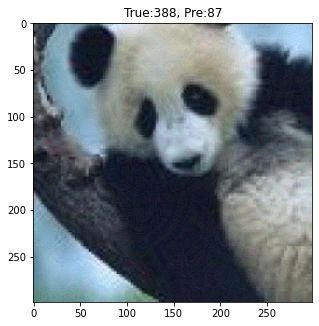

In [6]:
from utils import imshow, get_pred
idx = 0
pre = get_pred(model, adv_images[idx:idx+1], device)
imshow(adv_images[idx:idx+1], title="True:%d, Pre:%d"%(labels[idx], pre))

## Adversarial Attack (Targeted)

In [7]:
atk = PGD(model, eps=8/255, alpha=2/225, steps=10, random_start=True)
atk.set_normalization_used(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
atk.set_mode_targeted_by_function(target_map_function=lambda images, labels:(labels+1))
print(atk)

Attack mode is changed to 'targeted(custom)'.
PGD(model_name=ResNet, device=cuda:0, attack_mode=targeted(custom), targeted=True, normalization_used=True, eps=0.03137254901960784, alpha=0.008888888888888889, steps=10, random_start=True)


In [8]:
adv_images = atk(images, labels)

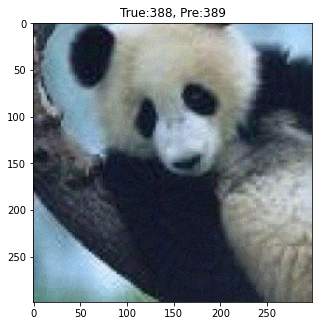

In [9]:
idx = 0
pre = get_pred(model, adv_images[idx:idx+1], device)
imshow(adv_images[idx:idx+1], title="True:%d, Pre:%d"%(labels[idx], pre))